# 71 人間関係ネットワークの可視化

In [2]:
import pandas as pd
# リピーター20人のSNSでのつながり
df_links = pd.read_csv("links.csv")
df_links.head()

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
0,Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


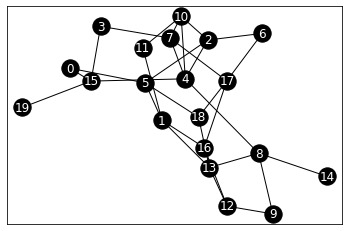

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

NUM = len(df_links.index)
for i in range(1, NUM+1):
    node_no = df_links.columns[i].strip("Node")
    G.add_node(str(node_no))

for i in range(NUM):
    for j in range(NUM):
        node_name = "Node" + str(j)
        if df_links[node_name].iloc[i]==1:
            G.add_edge(str(i),str(j))
nx.draw_networkx(G, node_color="k", edge_color="k", font_color="w")
plt.show()